## Introduction

This notebook presents the exploratory data analysis (EDA) and visualization component of a project that aims to predict whether a customer will recommend a product based on their review. The dataset contains customer feedback from an e-commerce clothing retailer. The insights gained from this analysis will guide the development of a binary classification model to predict product recommendations.

## Load libraries and Inspect Data

We begin by loading the dataset and performing an initial inspection to understand the structure, column names, and types of data we are dealing with.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer


df = pd.read_csv("/Users/hoangnhu/Desktop/AI/Predictive-Analysis-Ecommerce/Data/Womens Clothing E-Commerce Reviews.csv")  # Ensure the file is in the same directory as the notebook

In [6]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Clean data

This step includes removing duplicates, standardizing column names for ease of use, and stripping whitespace from text entrieg.

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.drop_duplicates(inplace=True)

In [8]:
df = df[(df['age'] > 0) & (df['age'] < 100)]
df = df[df['rating'].between(1, 5)]

## Handling Missing Values

We drop rows with missing values in essential columns such as 'review_text' and 'recommended_ind', which are critical for the prediction task. For less essential text fields like 'title', we impute missing values with empty strings to maintain consistency.

In [9]:
df = df.dropna(subset=['review_text', 'recommended_ind'])
df['title'] = df['title'].fillna('')

# Analyze Distributions

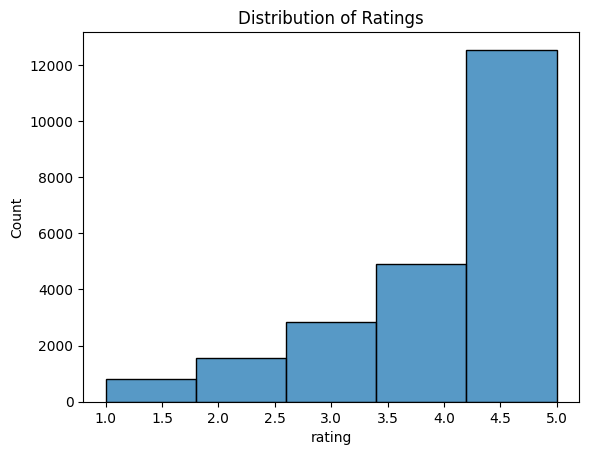

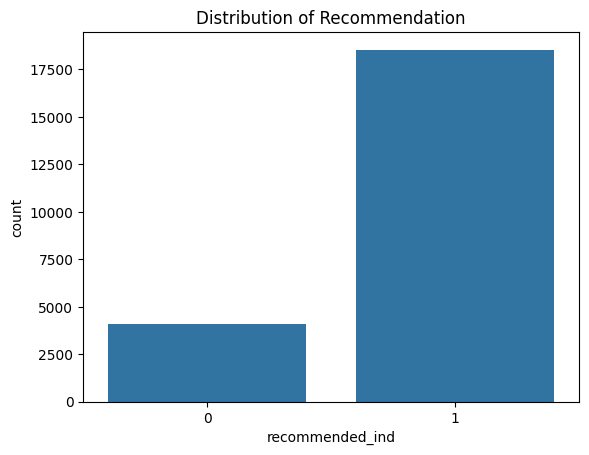

In [ ]:
# Histogram for a numerical feature
sns.histplot(df['rating'], bins=5)
plt.title('Distribution of Ratings')
plt.show()

# Count plot for categorical feature
sns.countplot(x='recommended_ind', data=df)
plt.title('Distribution of Recommendation')
plt.show()


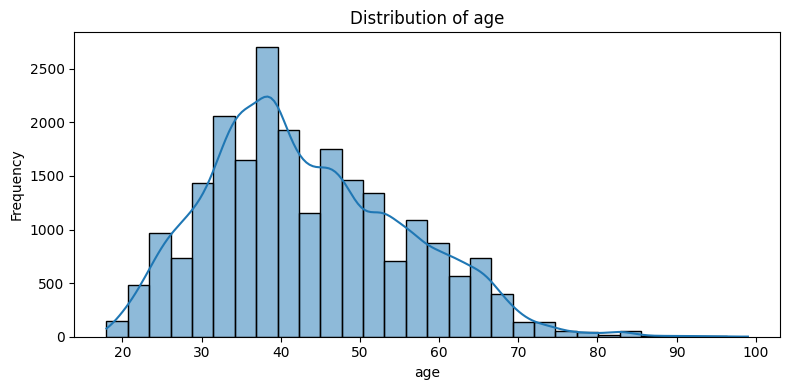

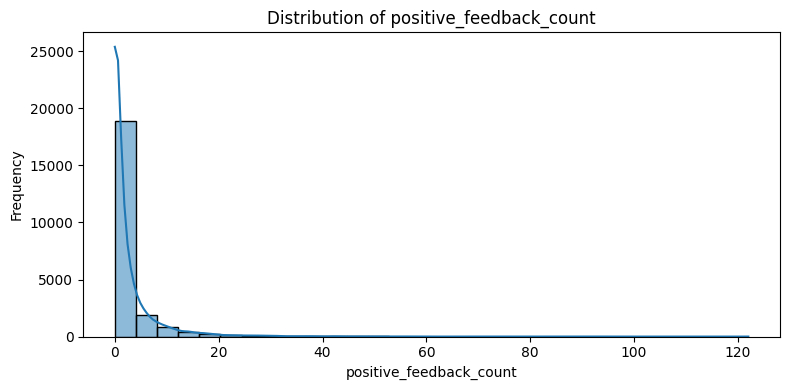

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['age', 'positive_feedback_count']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


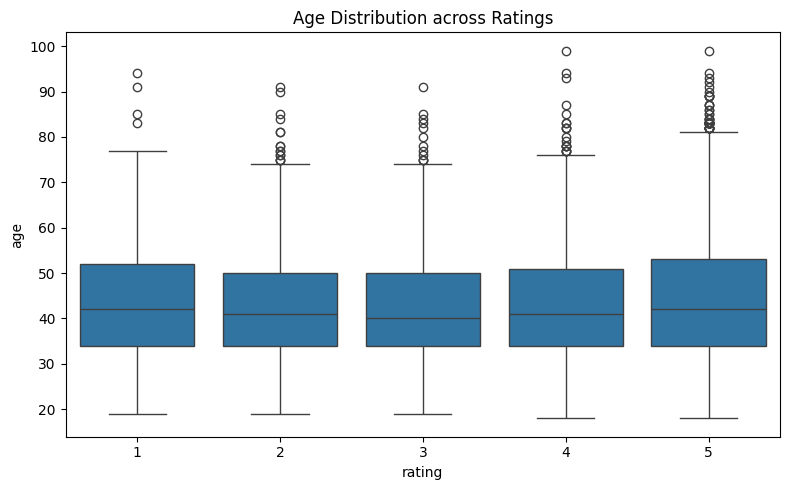

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='rating', y='age', data=df)
plt.title('Age Distribution across Ratings')
plt.tight_layout()
plt.show()


## Explore feature relationships

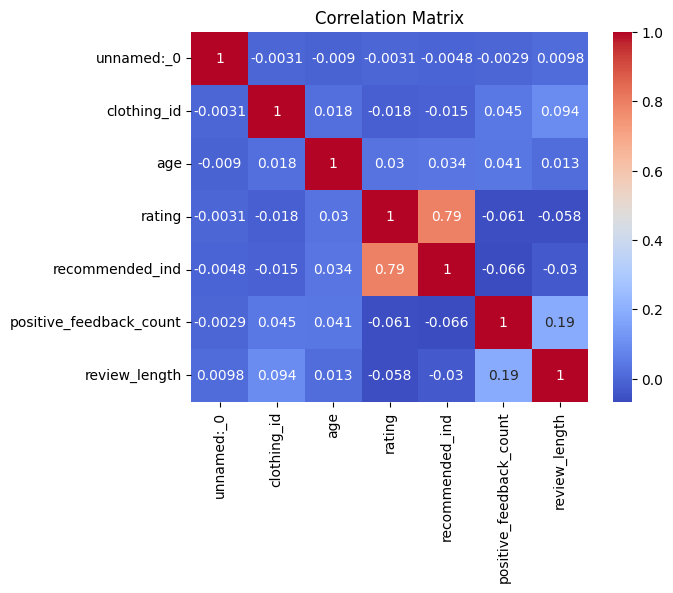

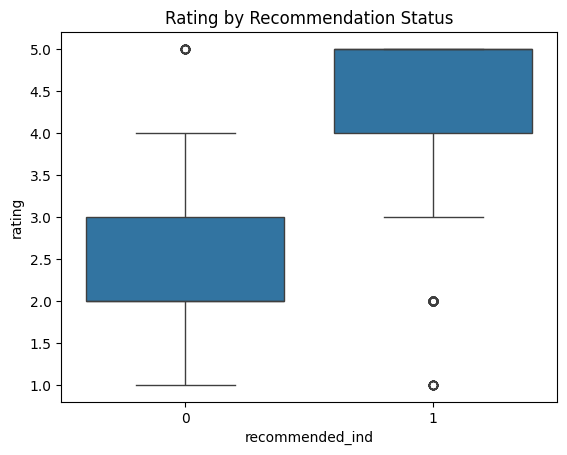

In [ ]:
# Ensure only numeric columns are used for correlation
numeric_df = df.select_dtypes(include=['number']).dropna()

# Correlation heatmap
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplot by target
sns.boxplot(x='recommended_ind', y='rating', data=df)
plt.title('Rating by Recommendation Status')
plt.show()


## Exploratory Data Analysis (EDA)

We conduct statistical analysis and visualizations to understand key characteristics of the data. This includes:

- Distribution of the target variable (`recommended_ind`)
- Relationship between age and recommendations
- Frequency of feedback across product categories
- Word clouds to visualize common themes in positive and negative reviews

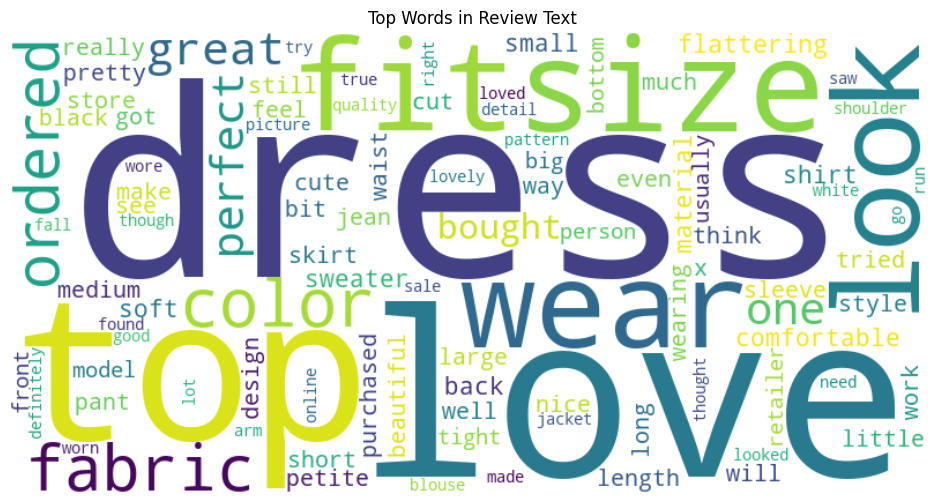

In [14]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# remove missing values
text_data = df['review_text'].dropna()

combined_text = " ".join(text_data)

# Tạo Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(combined_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words in Review Text")
plt.show()


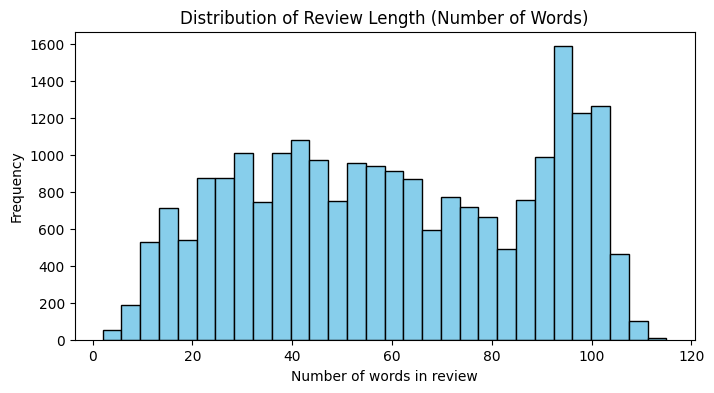

In [25]:
df['review_length'] = df['review_text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,4))
plt.hist(df['review_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Length (Number of Words)')
plt.xlabel('Number of words in review')
plt.ylabel('Frequency')
plt.show()

### One-Hot Encoding for Categorical Variables

To use categorical features in machine learning models, we convert them into binary format using one-hot encoding. This step ensures that our model can interpret and learn from features such as 'division_name', 'department_name', and 'class_name'.

In [15]:
df = pd.get_dummies(df, columns=['division_name', 'department_name', 'class_name'], drop_first=True)

### TF-IDF Vectorization

We apply TF-IDF to the review text to convert unstructured text data into numerical form. This method helps highlight the most relevant words in customer feedback for the classification task.

In [16]:
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf.fit_transform(df['review_text'])

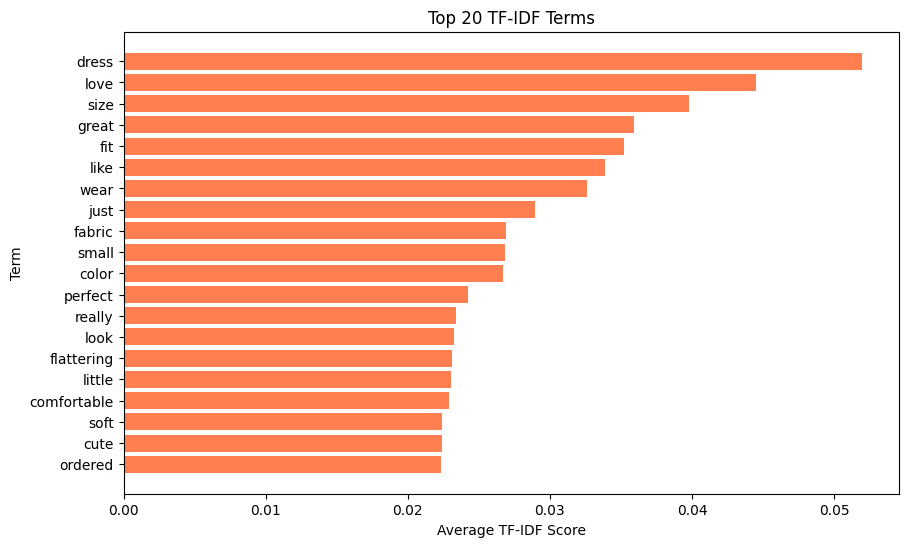

In [27]:
import numpy as np

tfidf_means = np.asarray(X_tfidf.mean(axis=0)).ravel()
terms = tfidf.get_feature_names_out()

# convert to DataFrame for easier handling
tfidf_df = pd.DataFrame({'term': terms, 'tfidf': tfidf_means})

# top 20 TF-IDF terms
top_tfidf = tfidf_df.sort_values(by='tfidf', ascending=False).head(20)

# plot
plt.figure(figsize=(10,6))
plt.barh(top_tfidf['term'][::-1], top_tfidf['tfidf'][::-1], color='coral')
plt.title('Top 20 TF-IDF Terms')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Term')
plt.show()

In [18]:
# Save data for the next steps
df.to_csv('FE_reviews.csv', index=False)